# Relações entre características

Uma parte importante da análise de dados é compreender as relações existentes entre as características do seu conjunto de dados. A partir dessas relações, podemos eventualmente identificar características redundantes, o que nos permite trabalhar com um conjunto menor de características selecionadas de forma a preservar a parte mais importante da informação existente em nosso conjunto de dados. 

Os principais tipos de relação entre características que investigamos em nossos dados são covariância, correlação, causalidade e condicionalidade.

## Covariância e correlação

A covariância é um conceito estatístico que avalia o comportamento de uma característica em função de outra. Podemos observar três tipos de correlação:
* **Positiva**: representa uma relação de proporcionalidade direta entre as características. Em outras palavras, o aumento no valor de uma característica implica no aumento no valor da outra característica. 
* **Negativa**: representa uma relação de proporcionalidade inversa entre as características. Em outras palavras, o aumento no valor de uma característica implica na redução do valor da outra característica. 
* **Nula**: representa uma ausência de relação entre as características. Em outras palavras, mudanças em uma característica não produzem um padrão claro de mudança em outra característica.

Em geral, usamos a covariância para analisar a correlação entre um ou mais pares de características. Enquanto a covariância nos informa se existe uma relação entre as características, a correlação quantifica essa relação. Podemos analisar a correlação entre os dados fazendo uso de recursos gráficos e analíticos.

### Entre um par de características

Podemos analisar a correlação entre um par de características graficamente, através de um **gráfico de dispersão**, ou analiticamente, através de diferentes **métricas de correlação**.

#### Gráfico de dispersão

Nesse tipo de gráfico, os dados são apresentados como pontos em um plano cartesiano, onde cada eixo representa uma característica que se deseja comparar.  A correlação entre as características é avaliada em função do padrão que se apresente. Pra ver um exemplo concreto, vamos usar os dados estimados das medianas da altura e peso do Brasil fornecidas pelo IBGE, divididas por faixas etárias.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
peso_altura = pd.read_csv("https://raw.githubusercontent.com/leobezerra/pandas-zero/master/datasets/ibge-peso-altura-brasil.csv", sep=";", decimal=",")
peso_altura.head()

,Idade,Altura,Peso
0,Menos de 1 ano,67.0,8.1
1,1 ano,81.5,11.5
2,2 anos,92.0,13.9
3,3 anos,98.9,16.0
4,4 anos,106.2,18.0


Quando um par de características apresenta covariância **positiva**, observamos uma tendência com inclinação positiva. Esse é o padrão esperado para a relação entre as características `"Altura"` e `"Peso"`, que podemos verificar com o método `regplot` da biblioteca `seaborn`:

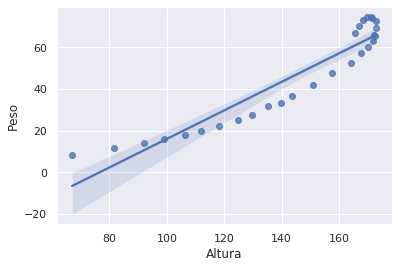

In [3]:
sns.regplot(x="Altura", y="Peso", data=peso_altura)
plt.show()

Note que o gráfico acima parece apresentar a mistura de dois padrões. Para a região onde o peso é menor que 65kg, há uma covariância positiva entre as características analisadas (reta de tendência com inclinação positiva):

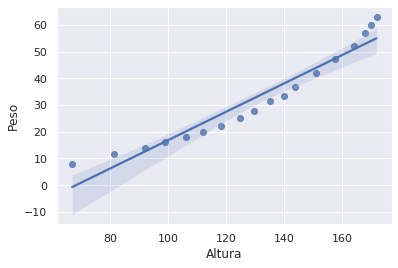

In [4]:
peso_ate_65 = peso_altura.query("Peso < 65")
sns.regplot(x="Altura", y="Peso", data=peso_ate_65)
plt.show()

Já para a região onde o peso é maior que 65kg, não há padrão formado, o que caracteriza uma **covariância nula** (reta de tendência paralela a um dos eixos):

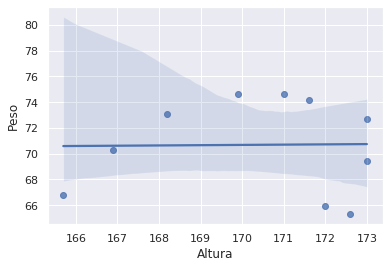

In [5]:
peso_maior_que_65 = peso_altura.query("Peso > 65")
sns.regplot(x="Altura", y="Peso", data=peso_maior_que_65)
plt.show()

Esse resultado faz sentido quando avaliamos que, em geral, medianas de peso até 65kg representam crianças e adolescentes em idade escolar, onde há uma forte relação entre a altura e o ganho de peso:

In [6]:
peso_ate_65["Idade"].unique()

array(['Menos de 1 ano', '1 ano', '2 anos', '3 anos', '4 anos', '5 anos',
       '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos',
       '12 anos', '13 anos', '14 anos', '15 anos', '16 anos', '17 anos'],
      dtype=object)

Já para medianas de peso maiores que 65kg, estamos falando sobre adolescentes em idade universitária, adultos e idosos, onde não há uma relação direta entre altura e peso:

In [7]:
peso_maior_que_65["Idade"].unique()

array(['18 anos', '19 anos', '20 a 24 anos', '25 a 29 anos',
       '30 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos',
       '65 a 74 anos', '75 anos ou mais'], dtype=object)

Para finalizar, quando um par de características apresenta covariância **negativa**, observamos uma tendência com inclinação negativa. Podemos gerar uma nova característica chamada de `"Faltam para 100kg"` a partir da característica `"Peso"`:

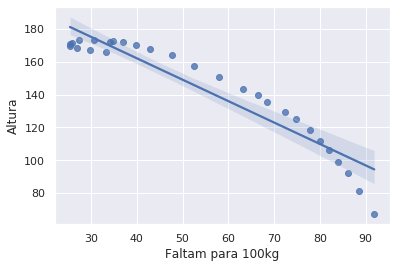

In [8]:
peso_altura["Faltam para 100kg"] = 100 - peso_altura["Peso"]
sns.regplot(x="Faltam para 100kg", y="Altura", data=peso_altura)
plt.show()

Note que a criação dessa nova característica não afetou a existência de dois padrões observada para a característica original. 

#### Métricas de correlação

As métricas de correlação mais comuns são as métricas de **Pearson** e de **Spearman**, que avaliam a aderência dos pontos à tendência observada. Para a correlação de Pearson, utilizamos como tendência uma reta, como nos gráfico produzidos com o `regplot`. Os dados avaliados a seguir apresentam boa aderência à reta de tendência, o que é capturado pela correlação de Pearson como um valor próximo a 1:

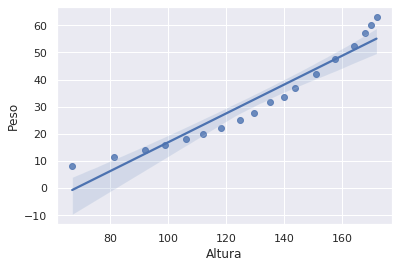

In [10]:
sns.regplot(x=peso_ate_65["Altura"], y=peso_ate_65["Peso"])
plt.show()

In [9]:
peso_ate_65[["Altura","Peso"]].corr()

,Altura,Peso
Altura,1.000000,0.965415
Peso,0.965415,1.000000


Para o caso de correlação negativa, temos que uma correlação forte é avaliada como valores próximos a -1:

In [11]:
peso_ate_65["Faltam para 100kg"] = 100 - peso_ate_65["Peso"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


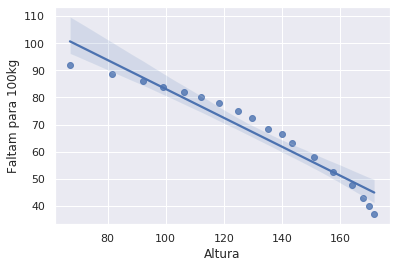

In [13]:
sns.regplot(x=peso_ate_65["Altura"], y=peso_ate_65["Faltam para 100kg"])
plt.show()

In [12]:
peso_ate_65[["Altura","Faltam para 100kg"]].corr()

,Altura,Faltam para 100kg
Altura,1.000000,-0.965415
Faltam para 100kg,-0.965415,1.000000


Por fim, uma correlação fraca será avaliada com valores próximos a 0:

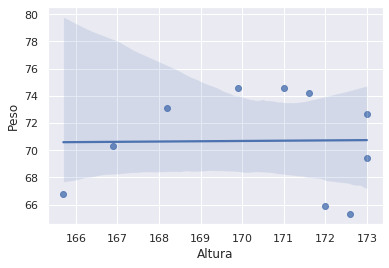

In [14]:
sns.regplot(x=peso_maior_que_65["Altura"], y=peso_maior_que_65["Peso"])
plt.show()

In [15]:
peso_maior_que_65[["Altura","Peso"]].corr()

,Altura,Peso
Altura,1.000000,0.014937
Peso,0.014937,1.000000


É importante observar que a correlação de Pearson mede apenas a aderência dos dados à tendência, não sendo afetada pela inclinação da reta de tendência (a não ser para indicar a correlação positiva ou negativa). Vamos ver este caso gerando uma característica para o índice de massa corporal:

In [0]:
peso_altura["IMC"] = peso_altura["Peso"] / (peso_altura["Altura"] * peso_altura["Altura"])

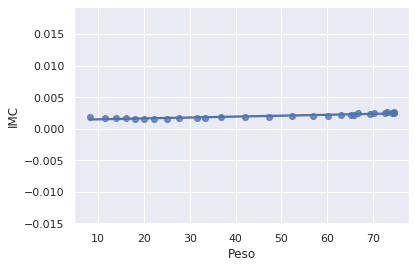

In [17]:
sns.regplot(x="Peso", y="IMC", data=peso_altura)
plt.show()

In [18]:
peso_altura[["Peso","IMC"]].cov()

,Peso,IMC
Peso,544.363228,7.812458e-03
IMC,0.007812,1.300185e-07


In [19]:
peso_altura[["Peso","IMC"]].corr()

,Peso,IMC
Peso,1.000000,0.928626
IMC,0.928626,1.000000


Note que, apesar de uma covariância baixa, os dados acima apresentam uma alta correlação. Este exemplo reflete bem a diferença entre a covariância e a correlação, uma vez que a covariância foca na inclinação da reta de tendência, enquanto a correlação foca na aderência dos dados a esta reta. Por medir a aderência dos dados à reta de tendência, a correlação de Pearson é descrita como linear. 

Em contrapartida, a correlação de Spearman permite avaliar a aderência dos dados a tendências lineares ou não. No exemplo abaixo, vemos que adotar uma medida de tendência não-linear (parâmetro `order=2` do método `regplot`) leva a uma maior aderência dos dados, o que é refletido pela correlação de Spearman:

In [20]:
peso_maior_que_65[["Altura","Peso"]].corr(method="spearman")

,Altura,Peso
Altura,1.000000,-0.219512
Peso,-0.219512,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:86: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


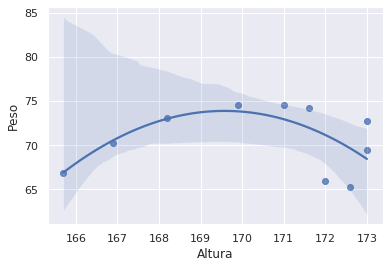

In [21]:
sns.regplot(x=peso_maior_que_65["Altura"], y=peso_maior_que_65["Peso"], order=2)
plt.show()

### Entre múltiplos pares de características

Quando trabalhamos com múltiplos pares de características, primeiro calculamos analiticamente a correlação entre cada par, para em seguida utilizarmos visualizações gráficas. Como visto acima, o método `corr` presente em objetos `DataFrame` permite o cálculo entre todos os pares de características existentes em um dataframe:

In [22]:
peso_altura.corr()

,Altura,Peso,Faltam para 100kg,IMC
Altura,1.000000,0.945137,-0.945137,0.760730
Peso,0.945137,1.000000,-1.000000,0.928626
Faltam para 100kg,-0.945137,-1.000000,1.000000,-0.928626
IMC,0.760730,0.928626,-0.928626,1.000000


Para melhorar a visualização dos dados, podemos gerar um **mapa de calor** a partir da matriz de correlações. Neste tipo de gráfico, as cores têm um papel fundamental no entendimento dos dados. Normalmente, cores mais frias (próximas a branco) representam correlações positivas, enquanto cores mais quentes (próximas a preto) nos apontam correlações negativas:

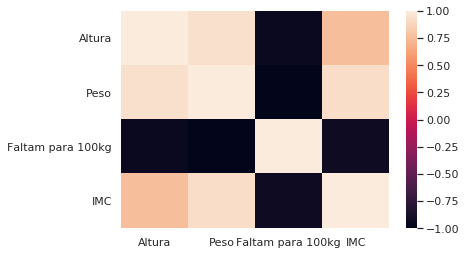

In [23]:
sns.heatmap(peso_altura.corr())
plt.show()

Podemos customizar o método `heatmap` de diferentes formas, trocando por exemplo a legenda lateral por anotações dentro de cada célula do mapa:

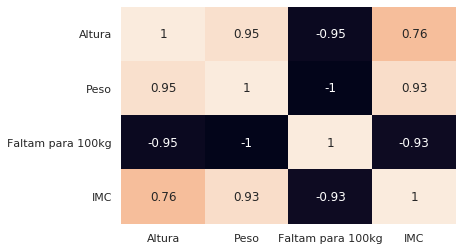

In [24]:
sns.heatmap(peso_altura.corr(), annot=True, cbar=False)
plt.show()

## Causalidade e condicionalidade

É importante salientar que uma alta correlação entre duas características **não implica de forma alguma** que uma característica é causada pela outra. De fato, é bastante difícil investigar causalidade apenas a partir da análise de um par de características.

> Esse site mostra fortes correlações entre características, mas que possivelmente não apresentam causalidade entre si https://www.tylervigen.com/spurious-correlations

Uma situação particular é o caso de características condicionais. Neste caso, o dataset disponível só apresenta dados para uma determinada característica quando o dado para uma outra característica satisfaz a determinada condição. 

Vamos analisar essa situação em um dataset sobre preços de casas do Kaggle. Para baixá-lo, siga primeiro [a etapa 1 deste tutorial](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0), que ensina a baixar as credenciais de acesso do Kaggle (`kaggle.json`). Uma vez que você tenha baixado suas credenciais, use o menu ao lado para fazer upload do arquivo para o Colab, e execute as três células abaixo:

In [25]:
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [26]:
!kaggle datasets download -d prevek18/ames-housing-dataset

ames-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
ames_housing = pd.read_csv("ames-housing-dataset.zip")
ames_housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


> Caso alguma das células acima não funcione, entre em contato com os mantenedores do pandas-zero ;)

Este dataset contém a descrição de várias propriedades, apresentando 82 características sobre cada propriedade. No entanto, quando um conjunto de dados apresenta um número alto de características, é comum que parte dessas características sejam informações adicionais em relação a outra característica.

No caso deste dataset, vamos filtrar apenas as características relacionadas ao termo `"Garage"`:

In [28]:
ames_garage = ames_housing.filter(like="Garage")
ames_garage.head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,2.0,528.0,TA,TA
1,Attchd,1961.0,Unf,1.0,730.0,TA,TA
2,Attchd,1958.0,Unf,1.0,312.0,TA,TA
3,Attchd,1968.0,Fin,2.0,522.0,TA,TA
4,Attchd,1997.0,Fin,2.0,482.0,TA,TA


Note que a primeira característica define o tipo de garagem. Esta característica apresenta os seguintes valores:

In [29]:
ames_garage["Garage Type"].value_counts(dropna=False)

Attchd     1731
Detchd      782
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

Um dos valores possíveis para esta característica é a falta deste dado (`NaN`, que identificamos passando o argumento `dropna=False` para o método `value_counts`). Quando este dado está em falta, as demais características deixam de fazer sentido:

In [30]:
ames_garage[ames_garage["Garage Type"].isna()]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
27,NaN,NaN,NaN,0.0,0.0,NaN,NaN
119,NaN,NaN,NaN,0.0,0.0,NaN,NaN
125,NaN,NaN,NaN,0.0,0.0,NaN,NaN
129,NaN,NaN,NaN,0.0,0.0,NaN,NaN
130,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2913,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2916,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2918,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2919,NaN,NaN,NaN,0.0,0.0,NaN,NaN


A forma como procedemos neste tipo de situação depende do contexto. Neste caso, como temos características nominais dependendo desta característica e um baixo número de casos onde a característica original está ausente, a melhor alternativa é remover estas observações:

In [31]:
ames_housing = ames_housing[~ames_housing["Garage Type"].isna()]
ames_housing["Garage Type"].value_counts(dropna=False)

Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

## Um exemplo simples de seleção de características

A principal vantagem de analisar as relações entre as características presentes em seu conjunto de dados é a possibilidade de selecionar um subconjunto de características que consegue representar a maior parte da informação contida no conjunto original. Pra entende o quanto isso é necessário, vamos tomar como exemplo o dataset de casas acima. Começamos por um mapa de calor, para tentar avaliar se temos características redundantes:

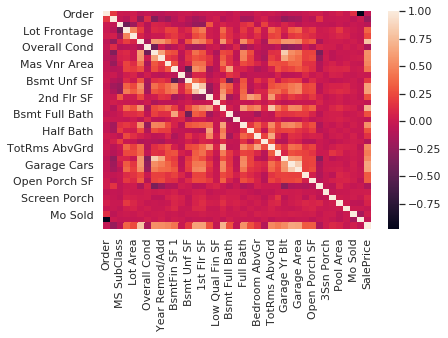

In [32]:
sns.heatmap(ames_housing.corr())
plt.show()

Note que é bastante difícil discutir algo em relação a um mapa tão grande. Uma ferramenta útil neste tipo de situação é o método `clustermap` da biblioteca `seaborn`, que agrupa os padrões observados no mapa acima.

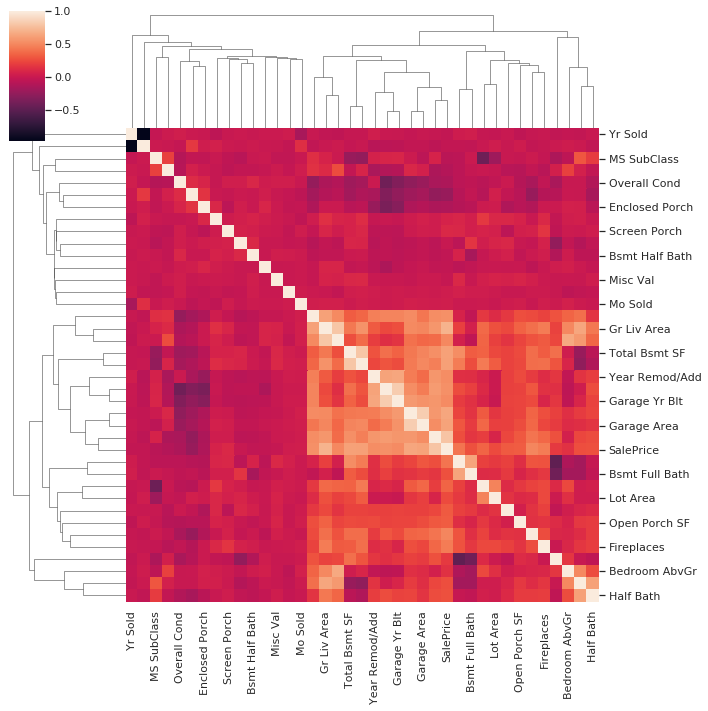

In [33]:
sns.clustermap(ames_housing.corr())
plt.show()

> Note que a visualização acima inclui um dendograma, que você pode pesquisar se quiser entender melhor o conceito de **análise de agrupamentos**.

Agora a visualização ficou bem mais interpretável que nossa primeira tentativa, mas ainda é possível melhorá-la um pouco mais. Usando os parâmetros do método `clustermap`, vamos aumentar o tamanho do gráfico para que os nomes de todas as características caibam na legenda (`figsize=(20,20)`) e trocar a legenda de cores pela anotação de valores (`annot=True, fmt='.1g', cbar_pos=None`):

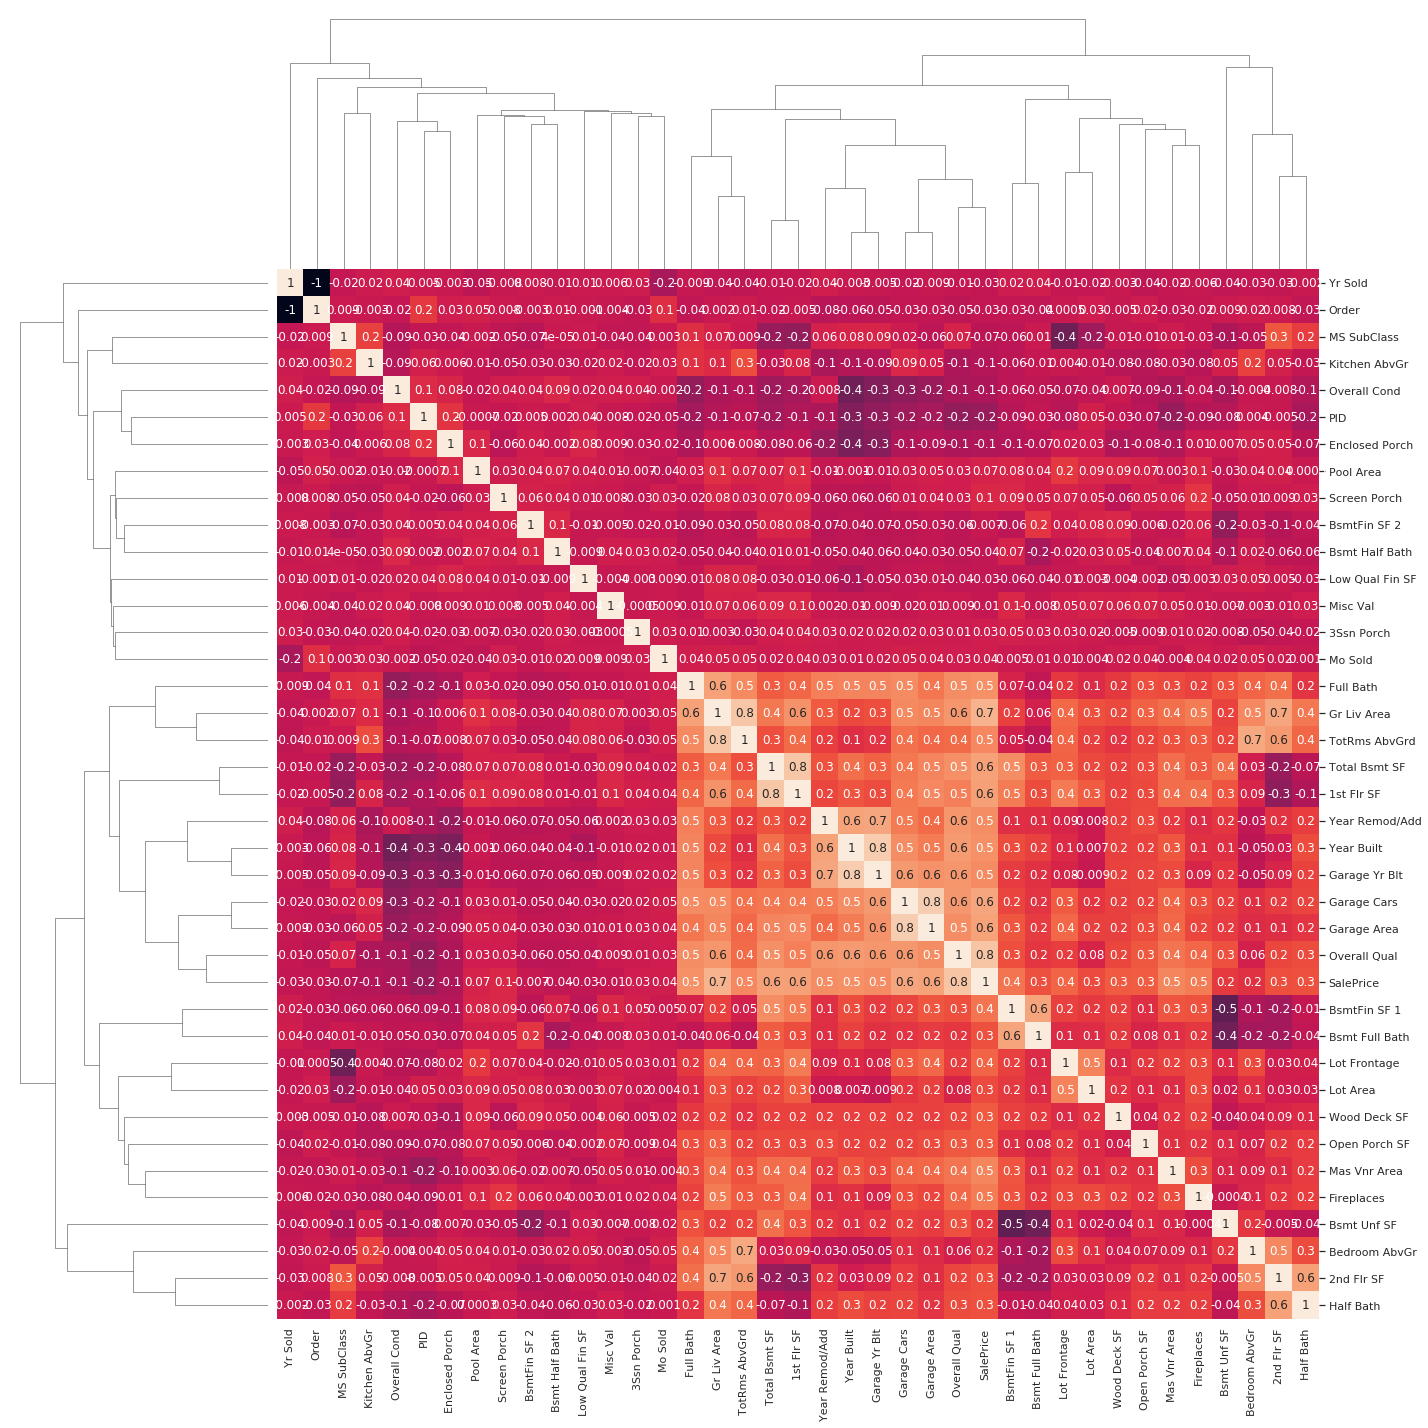

In [34]:
sns.clustermap(ames_housing.corr(), figsize=(20,20), annot=True, fmt='.1g', cbar_pos=None)
plt.show()

Para nossa análise, vemos que há dois grandes grupos de características. O primeiro grupo, praticamente se correlaciona com característica alguma do dataset. Por sua vez, o segundo grupo se correlaciona fortemente com as características do próprio segundo grupo. 

A forma como podemos proceder a partir destas informações depende do nosso objetivo. Se nosso objetivo for prever os valores da característica `"SalePrice"` a partir das demais características, podemos investigar inicialmente as características mais correlacionadas a ela. Neste caso, temos `"Overall Qual"` e `"Gr Liv Area"`, respectivamente a qualidade do imóvel e sua área habitável.

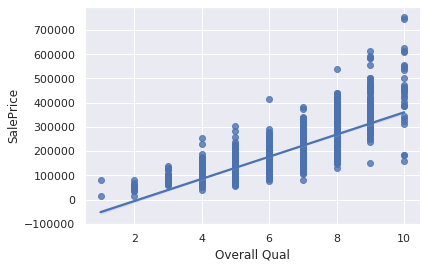

In [36]:
sns.regplot(x="Overall Qual", y="SalePrice", data=ames_housing)
plt.show()

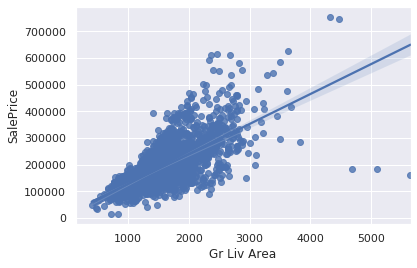

In [37]:
sns.regplot(x="Gr Liv Area", y="SalePrice", data=ames_housing)
plt.show()

Por sua vez, estas duas características têm forte correlação entre si:

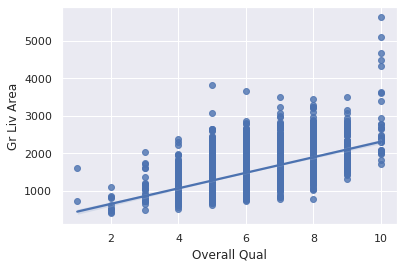

In [38]:
sns.regplot(x="Overall Qual", y="Gr Liv Area", data=ames_housing)
plt.show()

Assim, se quiséssemos trabalhar apenas com um conjunto reduzido de características, seria possível escolher apenas uma dentre as duas para manter em nosso conjunto de dados. 

> Na prática da análise de dados, há métodos robustos de **seleção de características** que você também pode pesquisar. Além da correlação, eles podem se basear em modelos estatísticos e de aprendizado de máquina uni e multi-variados 😉